# Altair - Instructional Notebook


## Overview

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.
Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly.

## Installation

The following link should help you with the installation for different platforms:

[Click for Altair Installation Steps](https://towardsdatascience.com/python-interactive-data-visualization-with-altair-b4c4664308f8)

### Common Error that might occure while running Altiar code in JupyterNotebook

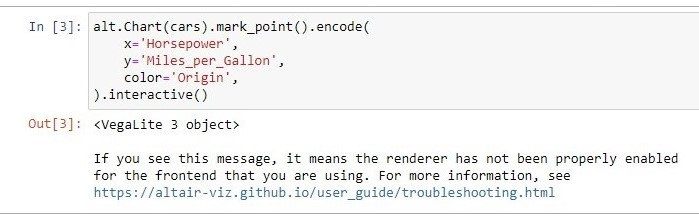

### If you see the above error use the following code in your Anaconda Terminal for installation.

`conda install -c conda-forge altair vega_datasets notebook vega3`

### Displaying the Charts

If you still get any issues with displaying the charts: 

[Click for Display Troubleshooting](https://altair-viz.github.io/user_guide/troubleshooting.html)

## Example Gallery

You will find here all the sample graphs for Altair Library.

[Click to view examples](https://altair-viz.github.io/gallery/index.html)

## Altair attributes

### Encoding the data

The details of any mapping depend on the type of the data. Altair recognizes four main data types:

| Data Type | Shorthand Code | Description |
| --- | :---: | --- |
| quantitative | Q | a continuous real-valued quantity |
| ordinal | O | a discrete ordered quantity |
| nominal | N | a discrete unordered category |
| temporal | T | a time or date value |
| geojson | G | a geographic shape |

### Marks

We saw in Encodings that the encode() method is used to map columns to visual attributes of the plot. The mark property is what specifies how exactly those attributes should be represented on the plot.

Altair provides a number of basic mark properties:

| Mark Name | Method | Description |
| --- | --- | --- |
| area | mark_area() | A filled area plot. |
| bar | mark_bar() | A bar plot. |
| circle| mark_circle() | A scatter plot with filled circles. |
| geoshape | mark_geoshape() | A geographic shape. |
| image | mark_image() | A scatter plot with image markers. |
| line | mark_line() | A line plot. |
| point | mark_point() | A scatter plot with configurable point shapes. |
| rect | mark_rect() | A filled rectangle, used for heatmaps. |
| rule | mark_rule() | A vertical or horizontal line spanning the axis. |
| square | mark_square() | A scatter plot with filled squares. |
| text | mark_text() | A scatter plot with points represented by text. |
| tick | mark_tick() | A vertical or horizontal tick mark. |

## Caution !

The following error might occure in Altair, if you try to use a dataset which has more than 5000 rows in it.

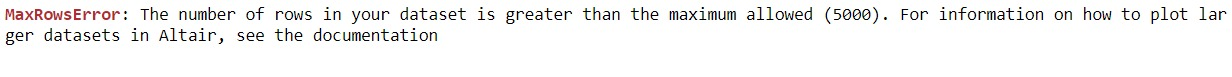

## Let's explore few features of Altair

### Feature 1: Highlights

#### `alt.selection()` 
It captures interactions from events like mouse clicks or drags to modify the chart. Selections can be used alone but if you want to change any element of your chart you will need to connect them to a condition.

#### `alt.condition()`
The `condition()` function takes the selection input and changes an element of the chart based on that input.

In [1]:
import altair as alt    # Import the library 
from vega_datasets import data    # We will use some built-in data from Vega Datasets

stocks = data.stocks()    # Load dataset
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [2]:
highlight = alt.selection(type='single', on='mouseover',
                         fields=['symbol'], nearest=True)    # mouse-over event to highlight symbol field.

base = alt.Chart(stocks).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)    # To make the plotted points transparent.
).add_selection(
    highlight
).properties(
    width=700
).properties(
    title='Date v/s price and Symbol'  # adding title to the chart
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(2), alt.value(6))    # Change the thickness from 2 to 6 when highlighted.
).properties(
    title='Date v/s price and Symbol'  # adding title to the chart
)


points + lines    # Combine points and lines in one graph.

(points + lines).configure_title(  # chart title configuration 
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='black'
)

alt.LayerChart(...)

#### - We can view a line more efficiently by using highlight feature, especially when we might have data for say 50 companies. The same chart in seaborn or matplotlib would be difficult to interpret.

### Feature 2: Brush Selection & Chart Transformation

#### `alt.selection_interval()` 

Determines the default event processing and data query for the selection. Vega-Lite currently supports three selection types:

- `"single"` – to select a single discrete data value on `click`.
- `"multi"` – to select multiple discrete data value; the first value is selected on `click` and additional values toggled on shift- `click`.
- `"interval"` – to select a continuous range of data values on `drag`.

#### `transform_filter()`

Select a subset of data based on a condition.

#### `alt.vconcat()`

Concatenate charts vertically

In [3]:
weather = data.seattle_weather()    # Load the dataset
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


This example shows how to add a simple rectangular brush to a scatter plot. By clicking and dragging on the plot, you can highlight points within the range

In [4]:
brush = alt.selection_interval()    # For a continuous selection
color = alt.Color('weather:N')

points = alt.Chart(weather).mark_point().encode(
 alt.X('monthdate(date):T', title='Date'),
 alt.Y('temp_max:Q', title='Maximum Daily Temperature (C)'),
 color=alt.condition(brush, color, alt.value('lightgray'))
).add_selection(
    brush
).properties(
    width=800,
    height=400
).properties(
    title='Date v/s max. Daily temp and Weather'  # adding title to the chart
)

points.configure_title(  # chart title configuration 
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='black'
)



alt.Chart(...)

In [5]:
bars = alt.Chart(weather).mark_bar().encode(
    y='weather:N',
    color='weather:N',
    x='count(weather):Q'
).transform_filter(    # Transform bars according to the selection.
    brush
).properties(
    width=800,
)

alt.vconcat(    # Concatinate vertically.
    points,
    bars,
    title="Seattle Weather: 2012-2015"
)


alt.VConcatChart(...)

#### - The interactive feature of Altair allows us to view data segment for any desired selection. In the above chart we can select data for a particular time period to view the weather during that period.

### Feature 3: Slider Bar Chart

#### `alt.binding_range()`

Shown as a slider to allow for selection along a scale.

#### `transform_calculate() `

Create a new data column using an arithmetic calculation on an existing column.

In [6]:
population = data.population()    # Load dataset
population.head()

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099


In [7]:
pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])    # Customize color for different genders.

slider = alt.binding_range(min=1900, max=2000, step=10)    # Initialize the slider

select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 1950})    # Set 'Year' field to our slider.


In [8]:
Chart=alt.Chart(population).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),    # Set color scale to the customized one.
    column='age:O'
).properties(    # Width of the bars.
    width=27
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")    # Check condition for Male and Female as the data has numerical representation.
).transform_filter(    # Transform according to year selection.
    select_year
).configure_facet(    # Set spacing between Age columns.
    spacing=12
).properties(
    title='Sex v/s Age and no.of people for selected Year'  # adding title to the chart
)


Chart.configure_title(  # chart title configuration 
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='black'
)

alt.Chart(...)

#### - Such type of chart is beneficial for comparing the data at glance over a particular feature. Here we can see the growth of population in different age groups and genders from 1900 to 2000.

### Feature 4: Dropdown Selection Chart

#### `binding_select()`

Drop down box for selecting a single item from a list.

In [9]:
cars = data.cars()    # Load dataset
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [10]:
input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])    # Initialize our dropdown list

selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')    # Set Origin field to the dropdown.

color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

Chart=alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'    # Displays the corresponding Name when we point on the chart.
).add_selection(
    selection
).properties(
    title='Horsepower v/s Miles_per_Gallon and selected Country'  # adding title to the chart
)


Chart.configure_title(  # chart title configuration 
    fontSize=15,
    font='Courier',
    anchor='middle',
    color='black'
)

alt.Chart(...)

#### Effect of `transform_filter()` on the above graph.

We can modify the same graph to show points of just one region at a time, by simply adding a `transform_filter()` for selection.

In [11]:
input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

Chart=alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip='Name:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    title='Sex v/s Age and no.of people for selected Year'  # adding title to the chart
)


Chart.configure_title(  # chart title configuration 
    fontSize=15,
    font='Courier',
    anchor='middle',
    color='black'
)

alt.Chart(...)

#### - Dropdown feature helps in separating out a particular category of data for better understanding.

### Feature 5: Brushing Scatter Plot with Table

#### `mark_text()`

To dispay text data for the points in scatter plot.

#### `alt.hconcat()`

Concatinate charts horizontally.

A scatter plot of the weather dataset, with data tables for Date, Min Temp, and Wind. The tables update to reflect the selection on the scatter plot.

In [12]:
weather_sample = weather.sample(frac=0.25, random_state=15)    # Sample 25% of the original data randomly.
weather_sample.shape    

(365, 6)

In [13]:
# Brush for selection

brush = alt.selection(type='interval')

# Scatter Plot

points = alt.Chart(weather_sample).mark_circle(size=60).encode(    # mark_circle() will show soild circles.
    x='monthdate(date)',
    y='temp_max',
    color=alt.condition(brush, 'weather', alt.value('grey'))
).add_selection(
    brush
).properties(
    title="Weather V/s Date with Min Temp, and Wind field"
)

# Base chart for data tables

ranked_text = alt.Chart(weather_sample).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables

show_date = ranked_text.encode(text='date:T').properties(title='Date')
min_temp = ranked_text.encode(text='temp_min:N').properties(title='Min Temp')
show_weather = ranked_text.encode(text='wind:N').properties(title='Wind')

text = alt.hconcat(show_date, min_temp, show_weather) # Combine data tables

# Build chart by concatinating all the elements.

alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

alt.HConcatChart(...)

#### - The tabular representation displays desired fields for selected data and makes the visualization much easy to interpret. This helps user to present multiple fields in a single interactive chart.